### [LeetCode Problem #2154: Keep Multiplying Found Values by Two](https://leetcode.com/problems/keep-multiplying-found-values-by-two/)
**Difficulty:** Easy

You are given an array of integers nums. You are also given an integer original which is the first number that needs to be searched for in nums.

You then do the following steps:

* If original is found in nums, multiply it by two (i.e., set original = 2 * original).
* Otherwise, stop the process.
* Repeat this process with the new number as long as you keep finding the number.
Return the **final** *value* of original.

```
Example 1:

Input: nums = [5,3,6,1,12], original = 3
Output: 24
Explanation: 
- 3 is found in nums. 3 is multiplied by 2 to obtain 6.
- 6 is found in nums. 6 is multiplied by 2 to obtain 12.
- 12 is found in nums. 12 is multiplied by 2 to obtain 24.
- 24 is not found in nums. Thus, 24 is returned.
```

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 150

#### Solutions

After submitting my first solution, the site showed me that my code is faster than *49%* of the solutions submitted. That means there's room for improvement in my code so, I rewrote it two more times. After the third solution, I noticed there are hints in LeetCode about solving the problem - how did I miss this? It mentioned that **set** data structures perform faster so I wrote my fourth solution. True enough, it beat **85%** of the submitted solutions! There's still room for improvement but I'll leave it at that for now.

Here are the solutions I tried and their explanation. At the end of this notebook, I plotted their runtimes side by side for visual comparison (because I'm a visual person and because why not?).

1. **List comprehension**. Using list comprehension, I went through each item on the list to find the matching value. As you can tell, this does the job but is quite inefficient.
        
2. **List using index**. Instead of using list comprehension, I used *list.index* function to go directly to the matching value. A lot more efficient but not much faster than my first solution specially when there are only a few items on the list.

3. **Dictionary using index**. I read that a dictionary is faster than a list so I tried that. It was worse (maybe because of my implementation?) so I didn't bother submitting this one.

4. **Set**. After reading the hint about sets, I tested it out and whoa! my code ran 80% faster than my first one. I was excited thinking it would be right up there in the top 10% but nope, it made it to the top 15% and I decided to call it a day.

5. **Set with remove**. Well, I was curious to see what I could have done better so I tried one more thing with sets. When I find the value I remove it from the set before searching for the next value. I thought the smaller set would make the subsequent searches run faster but the trade-off of removing a value and updating the set probably slowed it down.

6. **Dictionary using value**. I was still wondering what was wrong with the dictionary so I tried one more thing. I changed the way I was converting the list input from *dict(zip(list, list))* to *dict(enumerate(list))*. The trade-off is that now I have to search the dictionary value instead of the key. This was bad! It takes nearly twice as long since the values are not indexed.

In [3]:
class Solution:
    def __init__(self):
        self.best = 0
        self.solution_names = ['List Comprehension','List index','Dictionary', 'Set', 'Set & remove', 'Dict (value)']
        self.solution_runtimes = np.zeros(len(self.solution_names)).tolist()

    def callFindFinalValue(self, nums: list[int], original: int, option:int) -> int:
        if option == 0:
            return self.findFinalValue(nums, original)
        if option == 1:
            return self.findFinalValue1(nums, original)            
        if option == 2:
            return self.findFinalValue2(nums, original)            
        if option == 3:
            return self.findFinalValue3(nums, original)            
        if option == 4:
            return self.findFinalValue4(nums, original)                                                
        if option == 5:
            return self.findFinalValue5(nums, original)                                                

    def findFinalValue(self, nums: list[int], original: int) -> int:
        nums.sort()
        found, start = True, 0
        while found:
            x = [i for i in nums[start:] if i == original]
            if len(x) > 0:
                start = nums.index(original) + 1
                original = original * 2
            else:
                found = False
        return original

    def findFinalValue1(self, nums: list[int], original: int) -> int:
        found = True
        while found:
            try:
                nums.index(original)
            except ValueError:
                found = False
            else:
                original = original * 2
        return original

    def findFinalValue2(self, nums: list[int], original: int) -> int:
        nums_dict = dict(zip(nums, nums))
        found = True
        while found:
            found = original in nums_dict.keys()
            original = original * 2 if found else original
        return original

    def findFinalValue3(self, nums: list[int], original: int) -> int:
        nums_set = set(nums)
        found = True
        while found:
            found = original in nums_set
            original = original * 2 if found else original
        return original

    def findFinalValue4(self, nums: list[int], original: int) -> int:
        nums_set = set(nums)
        found = True
        while found:
            try:
                nums_set.remove(original)
                original = original * 2
            except KeyError:
                found = False
        return original        

    def findFinalValue5(self, nums: list[int], original: int) -> int:
        nums_dict = dict(enumerate(nums))
        found = True
        while found:
            found = original in nums_dict.values()
            original = original * 2 if found else original
        return original

#Create instance of Solution class
soln = Solution()

#### Check result of solutions

In [4]:
#Create test data
#nums = np.linspace(1, 1000, 500, dtype=int).tolist()
nums = np.arange(0, 1000, 5, dtype=int).tolist()
original = 50
expected_value = 1600

In [5]:
#Run the solutions and print their results
print('Expected value: {}'.format(expected_value))
for i in range(len(soln.solution_names)):
    print('{}: {}'.format(soln.solution_names[i], soln.callFindFinalValue(nums, original, i)))

Expected value: 1600
List Comprehension: 1600
List index: 1600
Dictionary: 1600
Set: 1600
Set & remove: 1600
Dict (value): 1600


#### Compare solution runtimes

In [6]:
#Test runtime of one solution directly
%timeit soln.findFinalValue5(nums, original)

12.2 µs ± 262 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
#Get runtime of all solutions
for i in range(len(soln.solution_names)):
    soln.solution_runtimes[i] = timeit.timeit('soln.callFindFinalValue(nums, original, i)', globals=globals())

#Get the index of best solution
soln.best = soln.solution_runtimes.index(np.min(soln.solution_runtimes))    

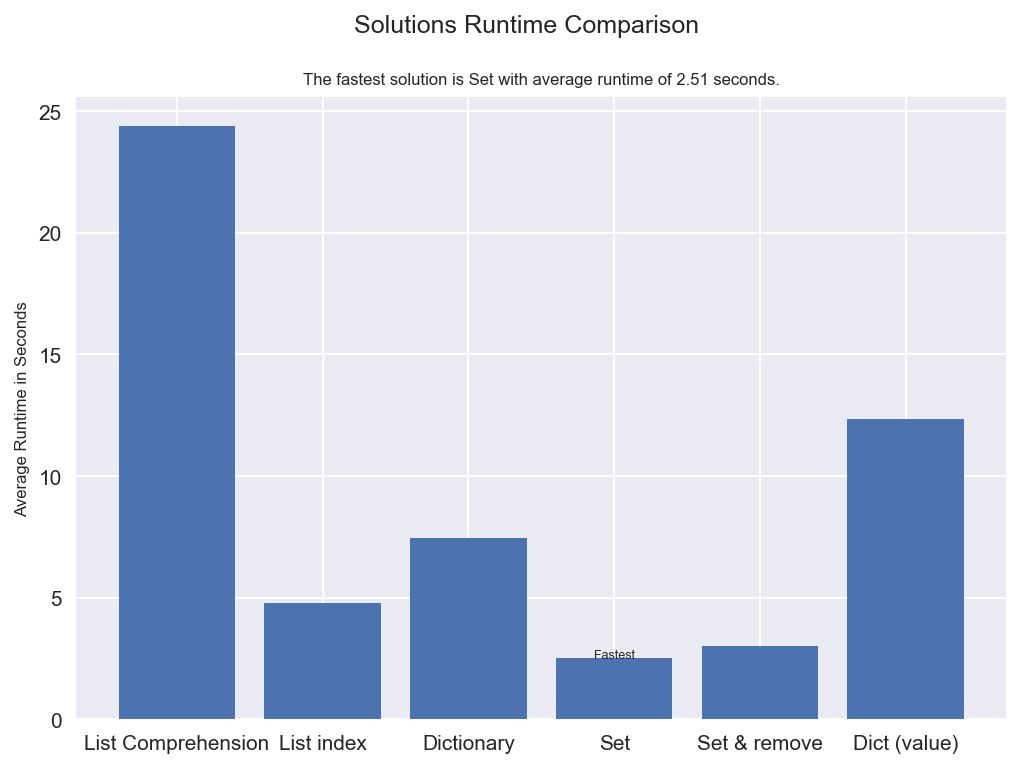

In [8]:
#Visualize runtimes for comparison
plt.bar(soln.solution_names, soln.solution_runtimes)
plt.ylabel("Average Runtime in Seconds", fontsize='8')
plt.suptitle("Solutions Runtime Comparison")
subtitle = 'The fastest solution is {} with average runtime of {:.2f} seconds.'.format(soln.solution_names[soln.best], soln.solution_runtimes[soln.best])
plt.title(subtitle, fontsize='8')

#Annotate best solution
plt.annotate("Fastest", xy=(soln.best,soln.solution_runtimes[soln.best]), ha="center", fontsize='6');